# Case study on Unsupervised Learning

In [34]:
#import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

# 1. Read the dataset to the python environment.

In [14]:
data=pd.read_csv('Wine.csv')

In [15]:
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [16]:
data.shape

(178, 13)

In [17]:
data.dtypes

Alcohol                 float64
Malic_Acid              float64
Ash                     float64
Ash_Alcanity            float64
Magnesium                 int64
Total_Phenols           float64
Flavanoids              float64
Nonflavanoid_Phenols    float64
Proanthocyanins         float64
Color_Intensity         float64
Hue                     float64
OD280                   float64
Proline                   int64
dtype: object

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Alcohol               178 non-null    float64
 1   Malic_Acid            178 non-null    float64
 2   Ash                   178 non-null    float64
 3   Ash_Alcanity          178 non-null    float64
 4   Magnesium             178 non-null    int64  
 5   Total_Phenols         178 non-null    float64
 6   Flavanoids            178 non-null    float64
 7   Nonflavanoid_Phenols  178 non-null    float64
 8   Proanthocyanins       178 non-null    float64
 9   Color_Intensity       178 non-null    float64
 10  Hue                   178 non-null    float64
 11  OD280                 178 non-null    float64
 12  Proline               178 non-null    int64  
dtypes: float64(11), int64(2)
memory usage: 18.2 KB


In [19]:
data.describe()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


In [20]:
data.isnull().sum()

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
dtype: int64

# 2. Try out different clustering models in the wine dataset.

In [11]:
#Standard scaling
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
df1=sc.fit_transform(data)

# K-Means Clustering

In [23]:
from sklearn.cluster import KMeans

#print within cluster sum of squares
wcss=[]
for i in range(1,14):
    kmeans=KMeans(n_clusters=i, init='k-means++', random_state=42)
    kmeans.fit(df1)
    wcss.append(kmeans.inertia_)
    print(kmeans.inertia_)

2313.9999999999986
1659.0079672511504
1277.928488844643
1175.7051928197127
1104.861683962532
1042.3872037251417
988.0533283180057
940.708165089653
902.0783170433883
866.7991687164842
816.9778775673813
802.8796543612843
774.0552605734554


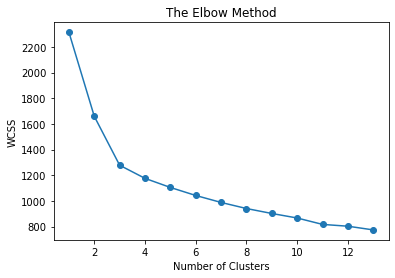

In [22]:
#elbow method
plt.plot(range(1,14),wcss,'-o')
plt.title('The Elbow Method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

From the above graph, the optimum number of clusters is 3.

In [24]:
#k-means with number  of clusters=3
kmeans=KMeans(n_clusters=3, init='k-means++', random_state=42)
y_kmeans=kmeans.fit_predict(df1)
y_kmeans


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 0, 2, 2, 1, 2, 2, 2, 2, 2, 2, 2, 2, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

# Agglomerative Clustering

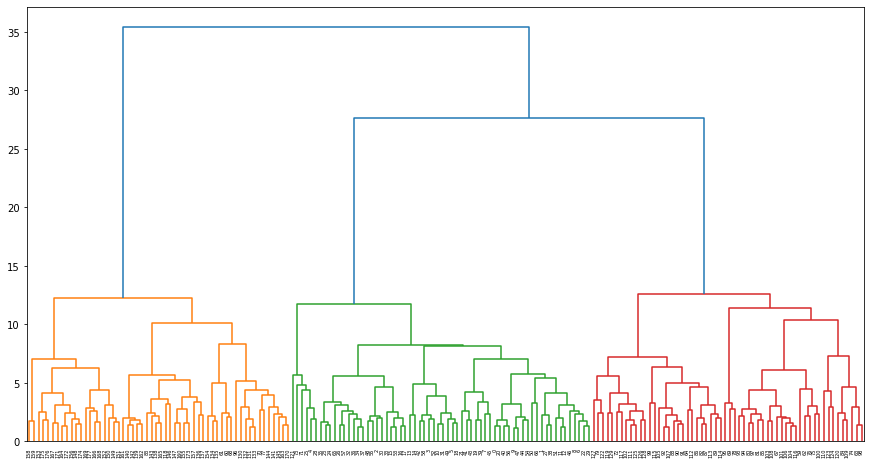

In [26]:
from scipy.cluster.hierarchy import dendrogram,linkage
linked=linkage(df1,method="ward")
plt.figure(figsize=(15,8))
dendrogram(linked,orientation="top",distance_sort="ascending",show_leaf_counts=True)
plt.show()

From the Dendrogram, the optimum number of clusters is 3.

In [27]:
from sklearn.cluster import AgglomerativeClustering
cluster=AgglomerativeClustering(n_clusters=3,affinity="euclidean",linkage="ward")
y_ahc=cluster.fit_predict(df1)
y_ahc

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 0, 1, 1, 0, 0, 0, 2,
       2, 0, 1, 0, 1, 2, 0, 2, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1], dtype=int64)

# 3. Find the optimum number of clusters in each model and create the model with the optimum number of clusters.


# K Means Clustering with optimum number of cluster as 3.

In [28]:
df = data.iloc[:,[0,1,2,3,4,5,6,7,8,9,10,11,12]].values

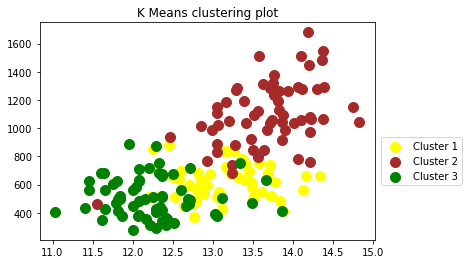

In [29]:
plt.scatter(df[y_kmeans == 0,0], df[y_kmeans == 0,12], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(df[y_kmeans == 1,0], df[y_kmeans == 1,12], s = 100, c = 'brown', label = 'Cluster 2')
plt.scatter(df[y_kmeans == 2,0], df[y_kmeans == 2,12], s = 100, c = 'green', label = 'Cluster 3')
plt.title('K Means clustering plot')
plt.legend(loc = (1.02,0.25))
plt.show()

In [30]:
y_kmeans = pd.DataFrame(y_kmeans)
y_kmeans = y_kmeans.rename(columns={0:'label'})

In [33]:
data_km = pd.concat([data,y_kmeans], axis=1)
data_km.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


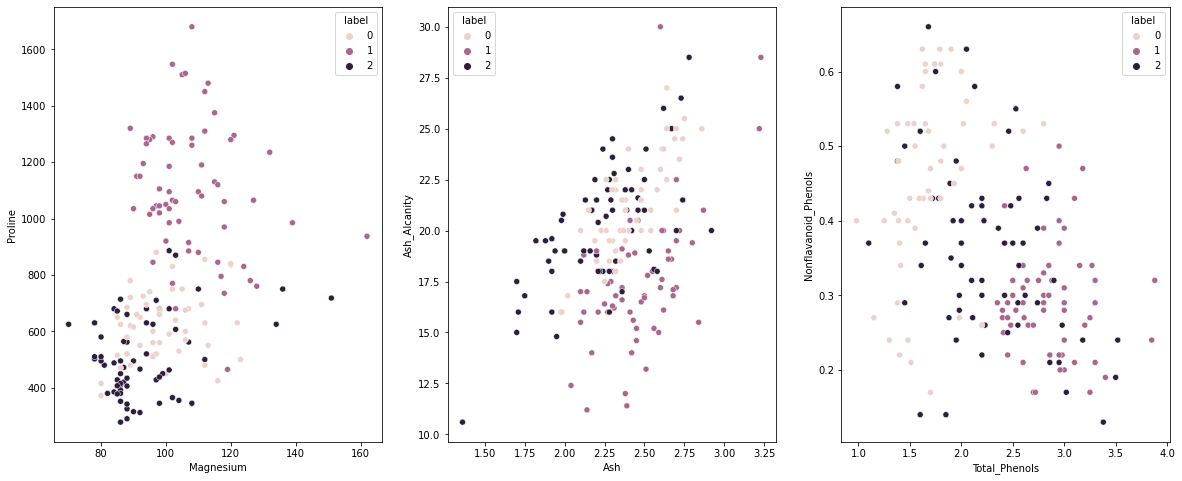

In [35]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.scatterplot(data=data_km, x='Magnesium', y='Proline', hue='label', ax=ax[0])
sns.scatterplot(data=data_km, x='Ash', y='Ash_Alcanity', hue='label', ax=ax[1])
sns.scatterplot(data=data_km, x='Total_Phenols', y='Nonflavanoid_Phenols', hue='label', ax=ax[2])
plt.show()

# Agglomerative Clustering with optimum number of cluster as 3.

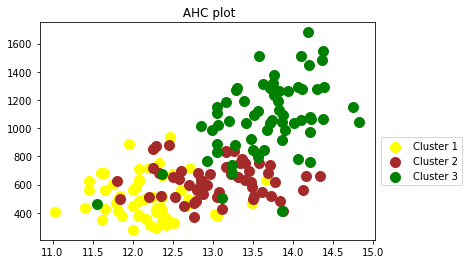

In [36]:
plt.scatter(df[y_ahc == 0,0], df[y_ahc == 0,12], s = 100, c = 'yellow', label = 'Cluster 1')
plt.scatter(df[y_ahc == 1,0], df[y_ahc == 1,12], s = 100, c = 'brown', label = 'Cluster 2')
plt.scatter(df[y_ahc == 2,0], df[y_ahc == 2,12], s = 100, c = 'green', label = 'Cluster 3')
plt.title(' AHC plot')
plt.legend(loc = (1.02,0.25))
plt.show()

In [37]:
y_ahc = pd.DataFrame(y_ahc)
y_ahc = y_ahc.rename(columns={0:'label'})

In [38]:
data_ahc = pd.concat([data,y_ahc], axis=1)
data_ahc.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,label
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,2
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,2
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,2
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,2
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,2


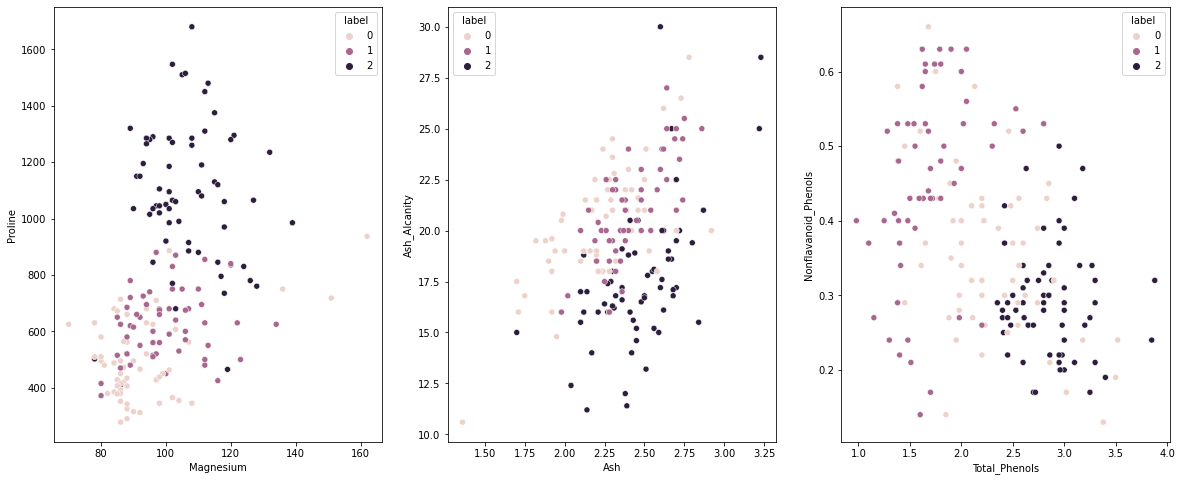

In [39]:
fig,ax=plt.subplots(nrows=1,ncols=3,figsize=(20,8))
sns.scatterplot(data=data_ahc, x='Magnesium', y='Proline', hue='label', ax=ax[0])
sns.scatterplot(data=data_ahc, x='Ash', y='Ash_Alcanity', hue='label', ax=ax[1])
sns.scatterplot(data=data_ahc, x='Total_Phenols', y='Nonflavanoid_Phenols', hue='label', ax=ax[2])
plt.show()

# Evaluation metric

In [40]:
# Silhouette score of Kmeans clustering
from sklearn.metrics import silhouette_score
s_s1 = silhouette_score(df1,y_kmeans)
print(s_s1)

0.2848589191898987


In [42]:
# Silhouette score of ahc clustering
s_s2 = silhouette_score(df1,y_ahc)
print(s_s2)

0.2774439826952265


from the evaluation metric,both the clustering methods gives almost same result